Pelanggan-1 tiba pada 5.10
Pelanggan-1 dilayani pada 5.10 setelah menunggu 0.00
Pelanggan-2 tiba pada 5.23
Pelanggan-2 dilayani pada 5.23 setelah menunggu 0.00
Pelanggan-3 tiba pada 6.49
Pelanggan-3 dilayani pada 6.49 setelah menunggu 0.00
Pelanggan-1 selesai pada 8.32
Pelanggan-4 tiba pada 12.14
Pelanggan-4 dilayani pada 12.14 setelah menunggu 0.00
Pelanggan-5 tiba pada 12.59
Pelanggan-6 tiba pada 12.74
Pelanggan-7 tiba pada 13.98
Pelanggan-8 tiba pada 17.49
Pelanggan-4 selesai pada 17.62
Pelanggan-5 dilayani pada 17.62 setelah menunggu 5.03
Pelanggan-9 tiba pada 17.63
Pelanggan-2 selesai pada 18.56
Pelanggan-6 dilayani pada 18.56 setelah menunggu 5.82
Pelanggan-5 selesai pada 19.83
Pelanggan-7 dilayani pada 19.83 setelah menunggu 5.86
Pelanggan-7 selesai pada 22.32
Pelanggan-8 dilayani pada 22.32 setelah menunggu 4.83
Pelanggan-10 tiba pada 22.88
Pelanggan-6 selesai pada 26.44
Pelanggan-9 dilayani pada 26.44 setelah menunggu 8.81
Pelanggan-9 selesai pada 26.50
Pelanggan-10 dilayani p

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20200\462507122.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Utilization"], y=[utilization_rate], palette='Blues')


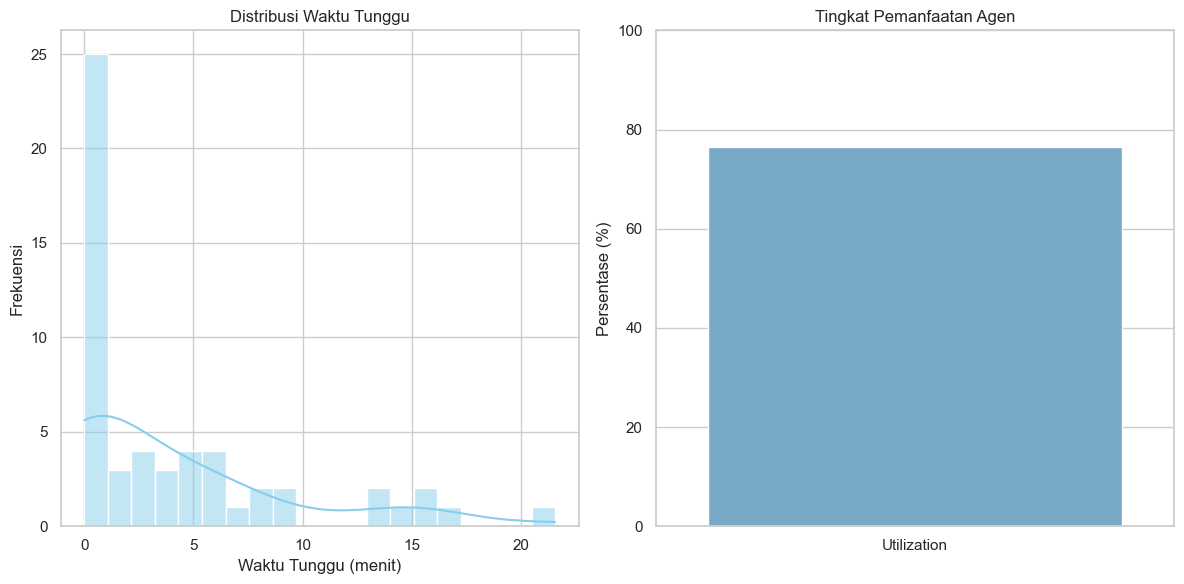

Utilization Rate: 76.39%
Rata-rata Waktu Tunggu: 4.01 menit


In [21]:
import simpy
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

RANDOM_SEED = 42
NUM_AGENTS = 3  # Jumlah agen layanan
INTERVAL_CUSTOMERS = 5  # Rata-rata waktu antar kedatangan pelanggan (menit)
SERVICE_TIME = 10  # Rata-rata waktu layanan (menit)
SIMULATION_TIME = 240  # Simulasi selama 4 jam (menit)

wait_times = []

def customer(env, name, service_time, agent, priority):
    arrival_time = env.now
    print(f"{name} tiba pada {arrival_time:.2f}")
    with agent.request(priority=priority) as request:
        yield request
        wait_time = env.now - arrival_time
        wait_times.append(wait_time)
        print(f"{name} dilayani pada {env.now:.2f} setelah menunggu {wait_time:.2f}")
        yield env.timeout(random.expovariate(1.0 / service_time))
        print(f"{name} selesai pada {env.now:.2f}")


def customer_generator(env, interval, service_time, agent):
    i = 0
    while True:
        yield env.timeout(random.expovariate(1.0 / interval))
        i += 1
        arrival_time = env.now
        if arrival_time % interval > 7:
            priority = 1
        else:
            priority = 2
        env.process(customer(env, f"Pelanggan-{i}", service_time, agent, priority))


def run_simulation():
    random.seed(RANDOM_SEED)
    env = simpy.Environment()
    agent = simpy.PriorityResource(env, NUM_AGENTS)
    env.process(customer_generator(env, INTERVAL_CUSTOMERS, SERVICE_TIME, agent))
    env.run(until=SIMULATION_TIME)


def visualize_results():
    sns.set(style="whitegrid")
    plt.figure(figsize=(12, 6))

    # Distribusi Waktu Tunggu
    plt.subplot(1, 2, 1)
    sns.histplot(wait_times, bins=20, kde=True, color='skyblue')
    plt.title("Distribusi Waktu Tunggu")
    plt.xlabel("Waktu Tunggu (menit)")
    plt.ylabel("Frekuensi")

    # Utilization Rate
    utilization_rate = (len(wait_times) * SERVICE_TIME) / (NUM_AGENTS * SIMULATION_TIME) * 100
    plt.subplot(1, 2, 2)
    sns.barplot(x=["Utilization"], y=[utilization_rate], palette='Blues')
    plt.title("Tingkat Pemanfaatan Agen")
    plt.ylim(0, 100)
    plt.ylabel("Persentase (%)")

    plt.tight_layout()
    plt.show()
    print(f"Utilization Rate: {utilization_rate:.2f}%")


if __name__ == "__main__":
    run_simulation()
    visualize_results()
    avg_wait_time = np.mean(wait_times)
    print(f"Rata-rata Waktu Tunggu: {avg_wait_time:.2f} menit")
